In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("data/50_Startups.csv")
data.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [23]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
X = data.iloc[: , :-1].values
Y = data.iloc[ : ,-1].values
X,Y

(array([[165349.2, 136897.8, 471784.1, 'New York'],
        [162597.7, 151377.59, 443898.53, 'California'],
        [153441.51, 101145.55, 407934.54, 'Florida'],
        [144372.41, 118671.85, 383199.62, 'New York'],
        [142107.34, 91391.77, 366168.42, 'Florida'],
        [131876.9, 99814.71, 362861.36, 'New York'],
        [134615.46, 147198.87, 127716.82, 'California'],
        [130298.13, 145530.06, 323876.68, 'Florida'],
        [120542.52, 148718.95, 311613.29, 'New York'],
        [123334.88, 108679.17, 304981.62, 'California'],
        [101913.08, 110594.11, 229160.95, 'Florida'],
        [100671.96, 91790.61, 249744.55, 'California'],
        [93863.75, 127320.38, 249839.44, 'Florida'],
        [91992.39, 135495.07, 252664.93, 'California'],
        [119943.24, 156547.42, 256512.92, 'Florida'],
        [114523.61, 122616.84, 261776.23, 'New York'],
        [78013.11, 121597.55, 264346.06, 'California'],
        [94657.16, 145077.58, 282574.31, 'New York'],
        [91749.1

In [8]:
X.shape

(50, 4)

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct_obj = ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder='passthrough')
'''x=pd.DataFrame(ct_obj.fit_transform(X),columns=["State_California","state_florida",'state_Newyork','R&D Spend', 'Administration', 'Marketing Spend'])
x'''
x = np.array(ct_obj.fit_transform(X))
x


array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2,random_state=34)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((40, 6), (10, 6), (40,), (10,))

In [11]:
from sklearn.linear_model import LinearRegression
reg_obj = LinearRegression()
reg_obj.fit(X_train,Y_train)

LinearRegression()

In [12]:
Y_pred = reg_obj.predict(X_test)
Y_pred

array([115487.79119197,  83383.2381955 , 185956.4508994 , 171389.27798941,
       189426.26026153, 158441.40434966,  99854.75860793, 128351.51082021,
       101280.91290305, 156906.60888135])

In [13]:
Y_test

array([126992.93,  81005.76, 191792.06, 182901.99, 192261.83, 155752.6 ,
        99937.59, 141585.52, 103282.38, 156122.51])

In [14]:
Y_pred = reg_obj.predict(X_test)
#Concatenation
array = np.concatenate((Y_pred.reshape(len(Y_pred),1),
                        Y_test.reshape(len(Y_test),1)),1)
array

array([[115487.79119197, 126992.93      ],
       [ 83383.2381955 ,  81005.76      ],
       [185956.4508994 , 191792.06      ],
       [171389.27798941, 182901.99      ],
       [189426.26026153, 192261.83      ],
       [158441.40434966, 155752.6       ],
       [ 99854.75860793,  99937.59      ],
       [128351.51082021, 141585.52      ],
       [101280.91290305, 103282.38      ],
       [156906.60888135, 156122.51      ]])

In [15]:
#as there is a confusion inabove array so we will use pression
np.set_printoptions(precision=2)
array

array([[115487.79, 126992.93],
       [ 83383.24,  81005.76],
       [185956.45, 191792.06],
       [171389.28, 182901.99],
       [189426.26, 192261.83],
       [158441.4 , 155752.6 ],
       [ 99854.76,  99937.59],
       [128351.51, 141585.52],
       [101280.91, 103282.38],
       [156906.61, 156122.51]])

In [17]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
accuracy = 100 - np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}%")


Mean Squared Error: 49965415.92
Root Mean Squared Error: 7068.62
Mean Absolute Error: 5285.77
R² Score: 0.96
Accuracy: 96.36%


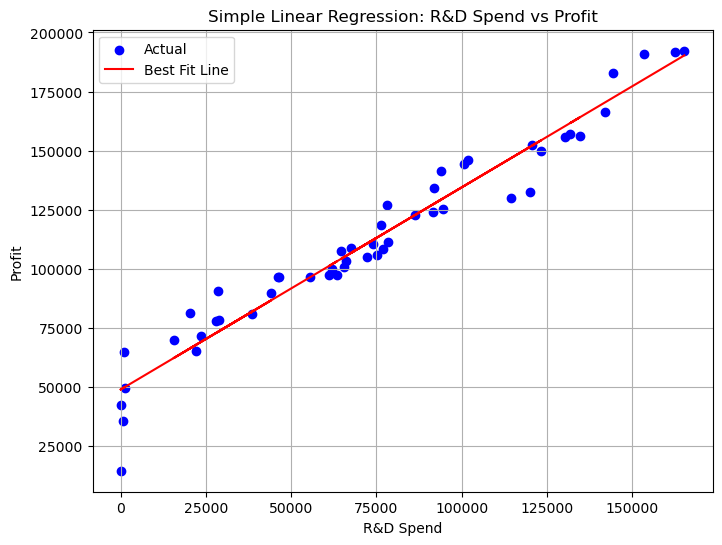

In [18]:

import matplotlib.pyplot as plt

# Simple Linear Regression Visualization (using R&D Spend only)
X_simple = X[:, 0].reshape(-1, 1)
model_simple = LinearRegression()
model_simple.fit(X_simple, Y)
y_simple_pred = model_simple.predict(X_simple)

plt.figure(figsize=(8, 6))
plt.scatter(X_simple, Y, color='blue', label='Actual')
plt.plot(X_simple, y_simple_pred, color='red', label='Best Fit Line')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Simple Linear Regression: R&D Spend vs Profit")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
x1 = data.iloc[:,0:3]
x1

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [21]:
y1 = data.iloc[: ,-1]

In [22]:
y1

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64